# Regularized linear least squares

In [32]:
using Plots, LinearAlgebra

We'll give an application in signal denoising. The "true" signal is smooth.

In [33]:
n = 300
t = LinRange(0,4,n)
x = @. sin(t) + t*cos(t)^2;

Now add noise.

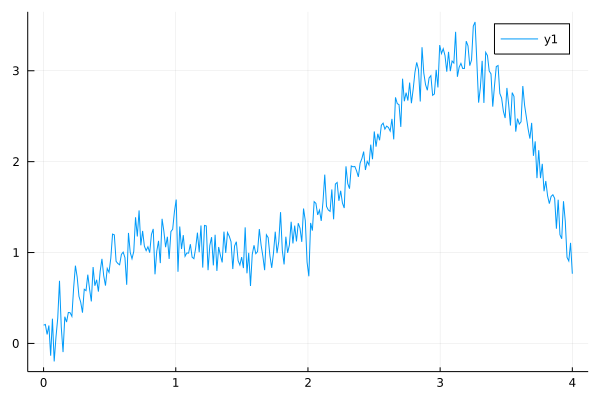

In [34]:
η = randn(n); η = η/norm(η)
b = x + 3*η;
plot(t, b)

Create the finite difference matrix $D$:

In [38]:
finiteDiff(n) = diagm(ones(n)) - diagm(+1 => ones(n-1))
finiteDiff(4)

4×4 Array{Float64,2}:
 1.0  -1.0   0.0   0.0
 0.0   1.0  -1.0   0.0
 0.0   0.0   1.0  -1.0
 0.0   0.0   0.0   1.0

In [39]:
D = finiteDiff(n);

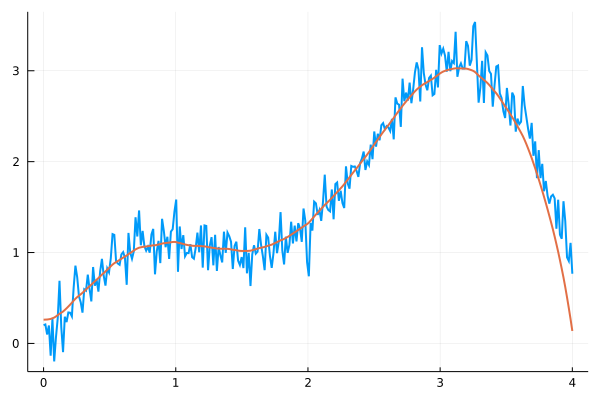

In [46]:
λ = 100

x = (I + λ*D'D)\b
plot(t, b, leg=false, w=2)
plot!(t, x, w=2)
